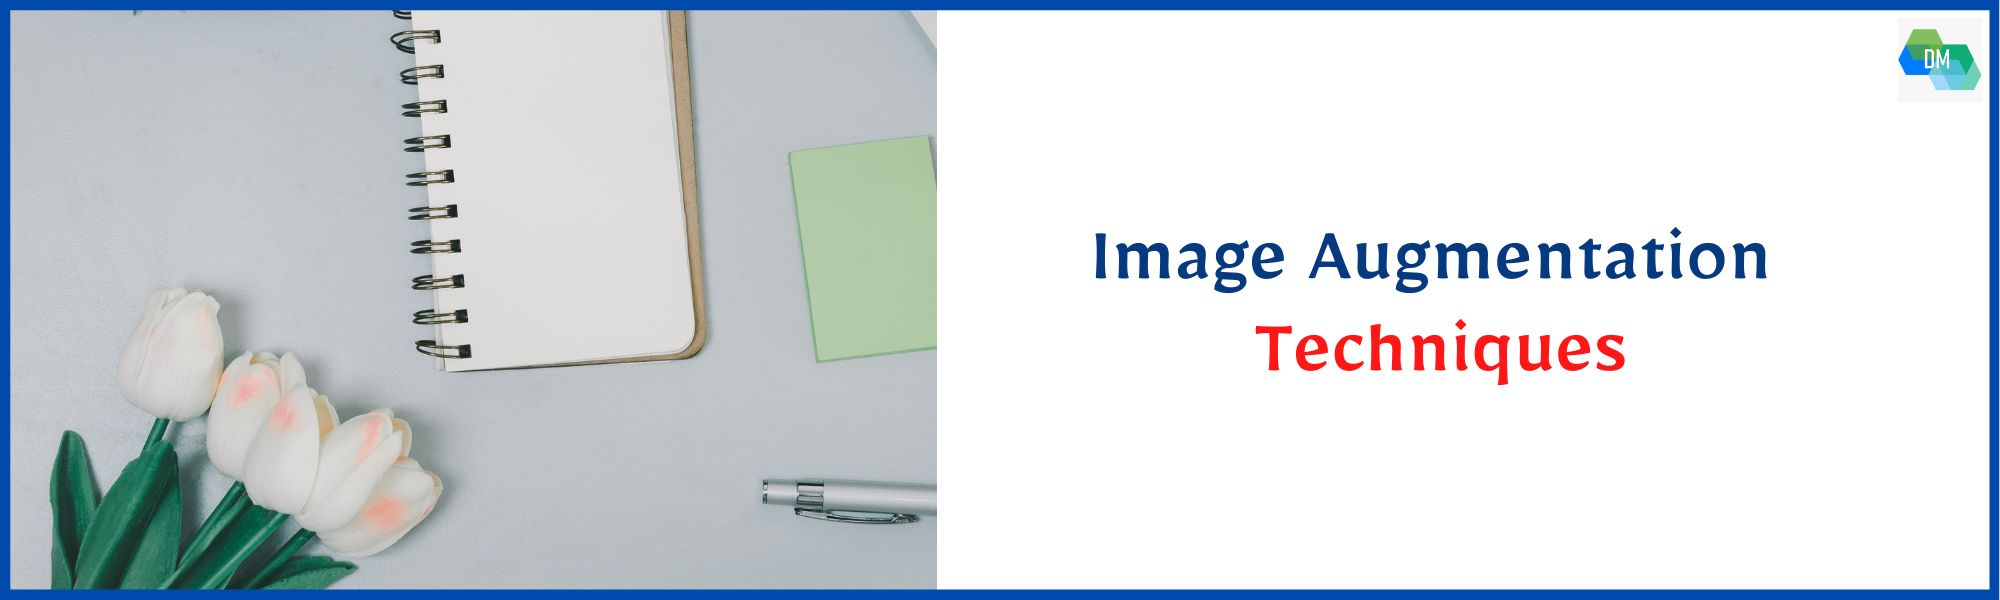

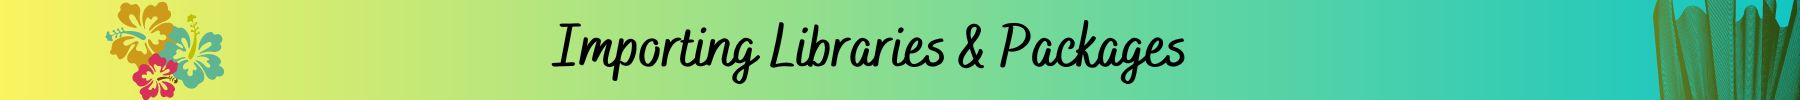

pip install ipyplot

!pip install "opencv-python-headless<4.3"

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
import ipyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%pylab inline
from IPython.display import HTML, Image

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


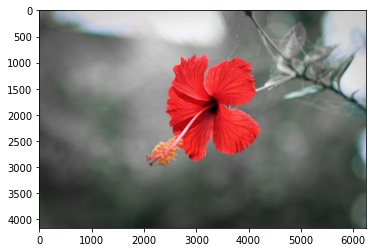

In [2]:
image = mpimg.imread(r'content\Grapevine Image Classification\HibiscusFlower.jpg')
imgplot = plt.imshow(image)
plt.show()

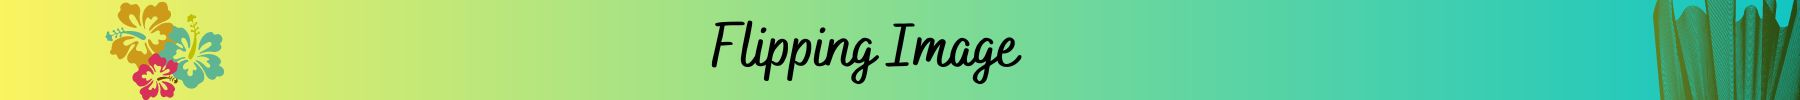

In [3]:
#vertically flipped 
img_vflip = cv2.flip(image, 0)
cv2.imwrite('cv_img_vflip.jpg', img_vflip)

#Horizontanlly flipped image
img_hflip = cv2.flip(image, 1)
cv2.imwrite('cv_hflip.jpg', img_hflip)

True


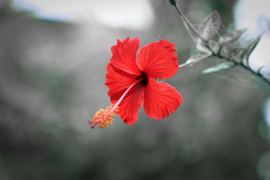
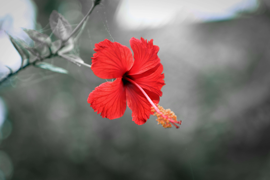
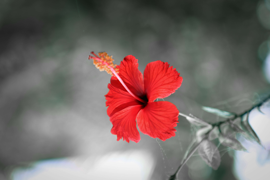


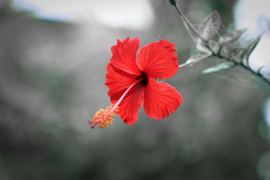
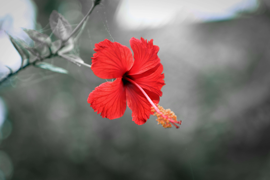
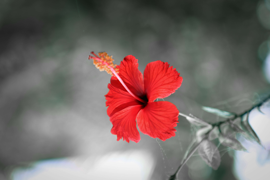

In [4]:
images_list=[image, img_hflip, img_vflip]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=270)

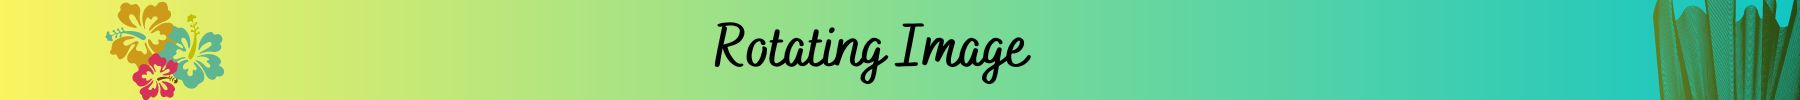

In [5]:
img_rotate_90_clockwise = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite('cv_rotate_90_clockwise.jpg', img_rotate_90_clockwise)

img_rotate_90_counterclockwise = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('cv_rotate_90_counterclockwise.jpg', img_rotate_90_counterclockwise)

img_rotate_180 = cv2.rotate(image, cv2.ROTATE_180)
cv2.imwrite('cv_rotate_180.jpg', img_rotate_180)

True


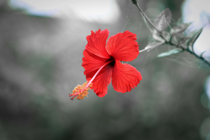
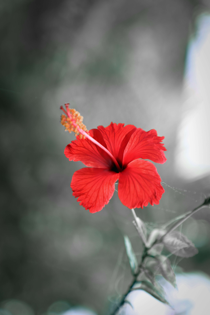
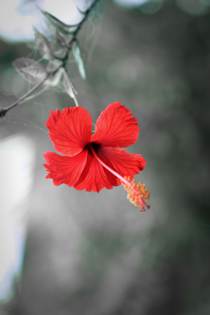
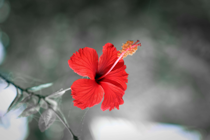


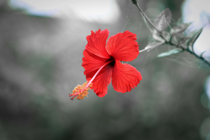
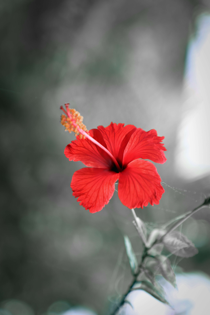
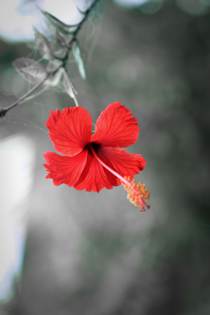
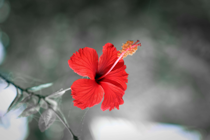

In [6]:
images_list=[image, img_rotate_90_clockwise, img_rotate_90_counterclockwise, img_rotate_180]
labels = ['Original', 'Rotated 90 Clockwise', 'Rotated 90 Counterclockwise','Rotated_180']
ipyplot.plot_images(images_list,labels=labels,img_width=210)

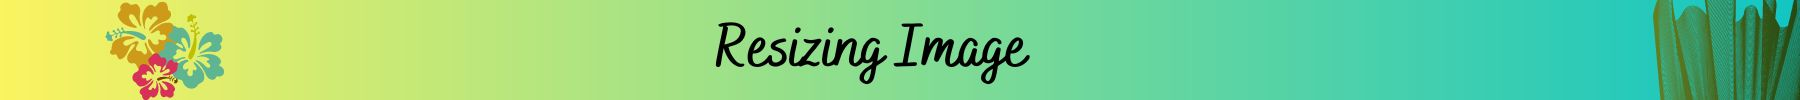

In [7]:
# upscale the image using new  width and height
up_width = 300
up_height = 500
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)


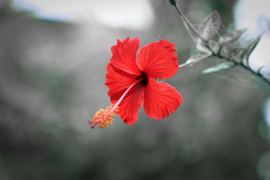
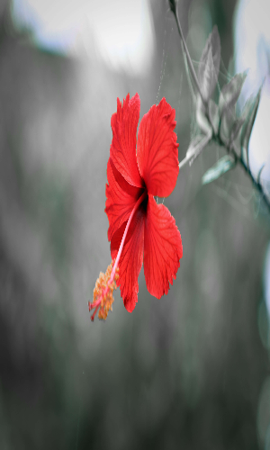


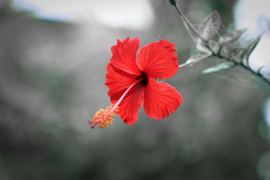
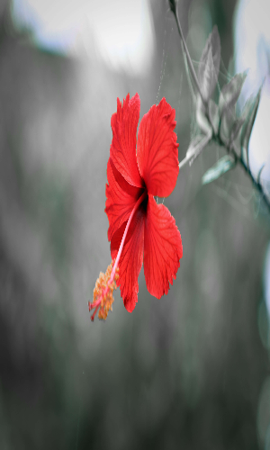

In [8]:
images_list=[image, resized_up]
labels = ['Original','Larger Image']
ipyplot.plot_images(images_list,labels=labels,img_width=270)

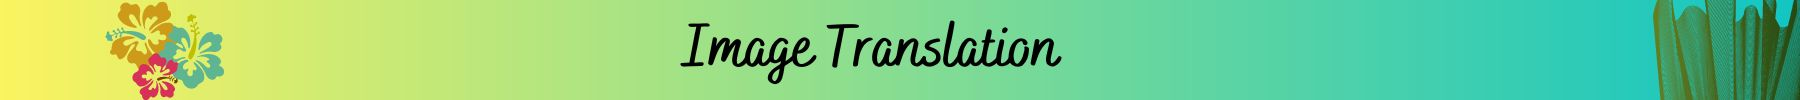

In [9]:
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
img_translation = cv2.warpAffine(image, T, (width, height))


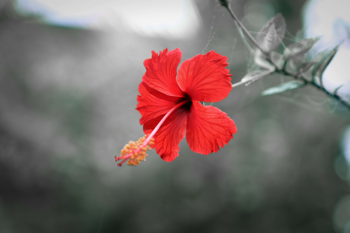
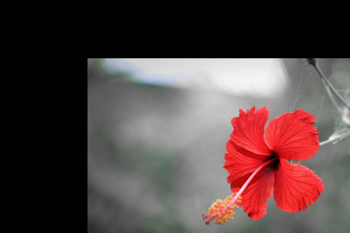


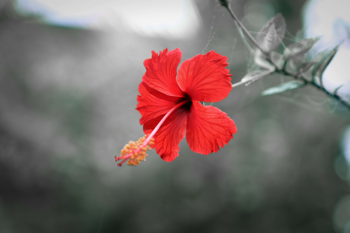
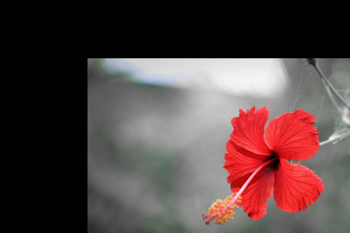

In [10]:
images_list=[image, img_translation]
labels = ['Original','Translation']
ipyplot.plot_images(images_list,labels=labels,img_width=350)

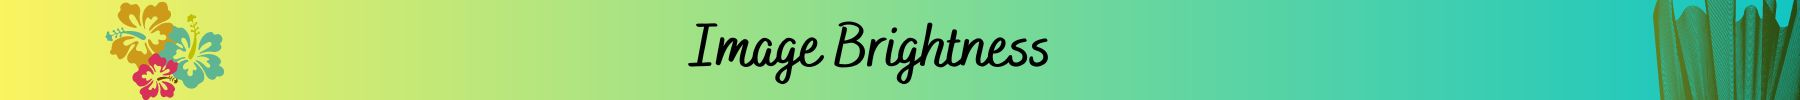

In [11]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [12]:
brightened_img = increase_brightness(image, value=150)


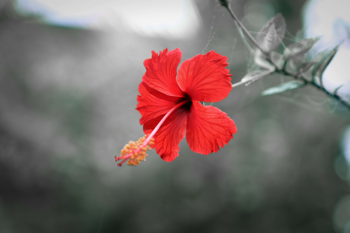
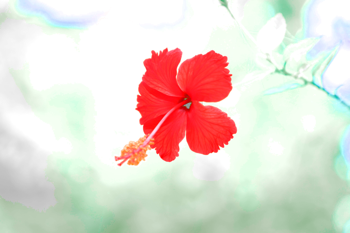


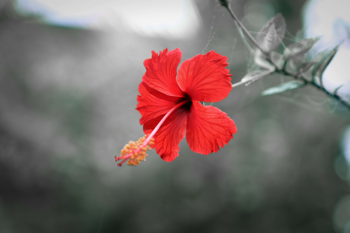
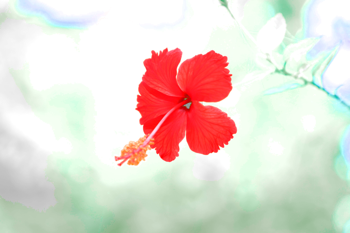

In [13]:
images_list=[image, brightened_img]
labels = ['Original','Brightened Image']
ipyplot.plot_images(images_list,labels=labels,img_width=350)

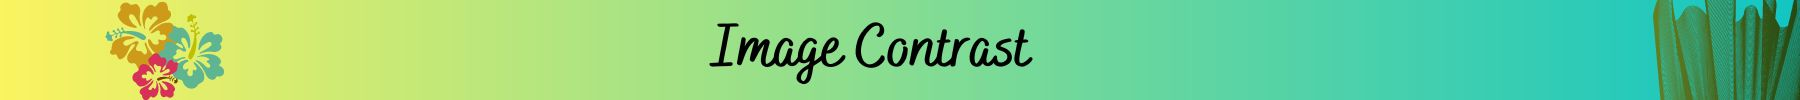

In [14]:
alpha = 3 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

contrast_img = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


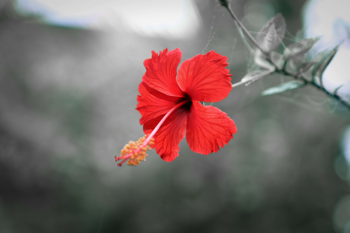
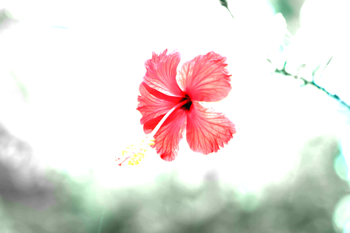


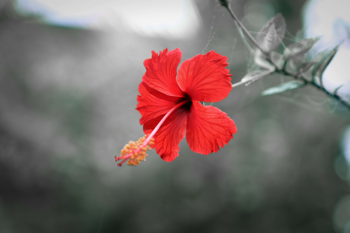
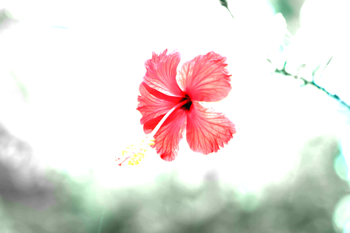

In [15]:
images_list=[image, contrast_img]
labels = ['Original','Contrast Image']
ipyplot.plot_images(images_list,labels=labels,img_width=350)

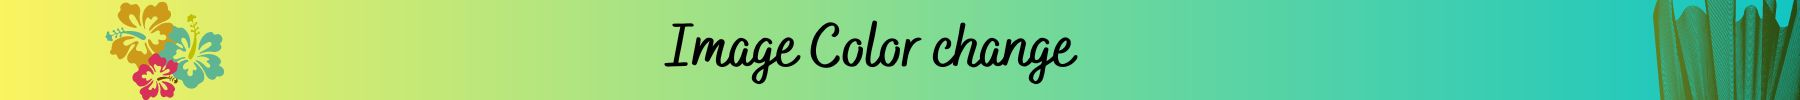

In [16]:
BGR2RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
BGR2HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


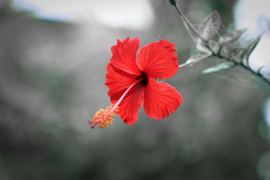
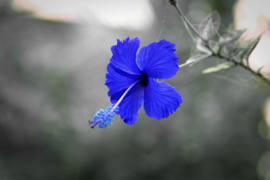
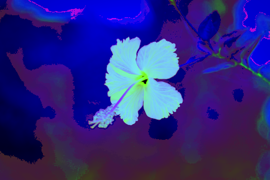


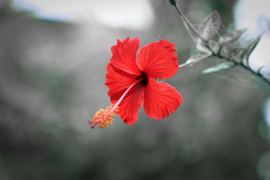
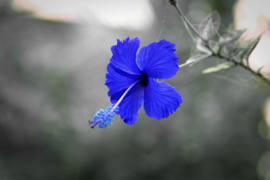
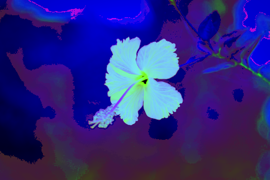

In [17]:
images_list=[image, BGR2RGB,BGR2HSV]
labels = ['Original','BGR2RGB','BGR2HSV']
ipyplot.plot_images(images_list,labels=labels,img_width=270)

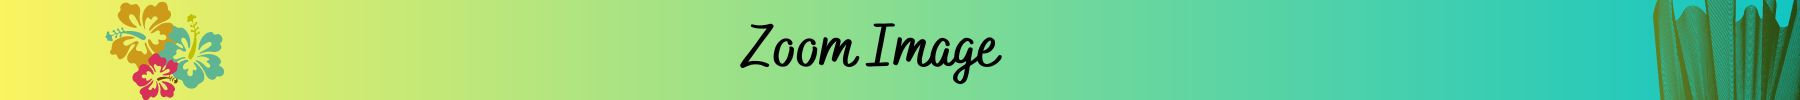

In [18]:
crop = image[1500:3500,2000:3500]

zoom_in = cv2.resize(crop, None, fx= 3, fy= 3.5, interpolation= cv2.INTER_LINEAR)

Text(0.5, 1.0, 'Zoomed_In')

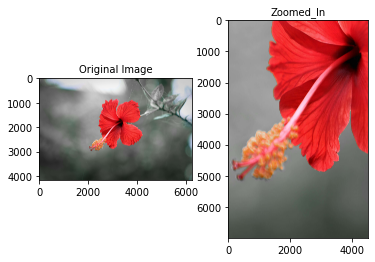

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,4))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(zoom_in)
ax[1].set_title("Zoomed_In", size=10)


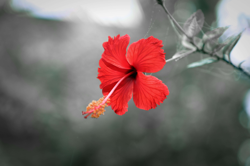
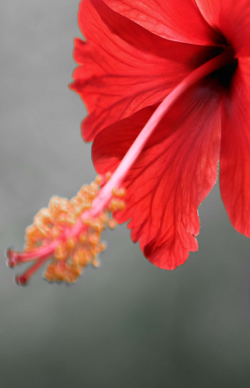


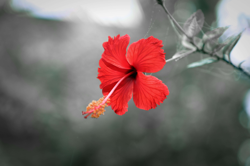
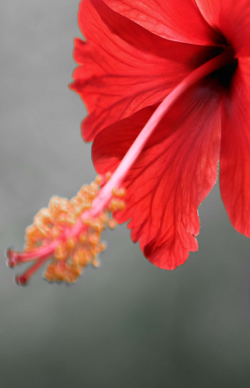

In [20]:
images_list=[image, zoom_in]
labels = ['Original','Zoomed In']
ipyplot.plot_images(images_list,labels=labels,img_width=250)

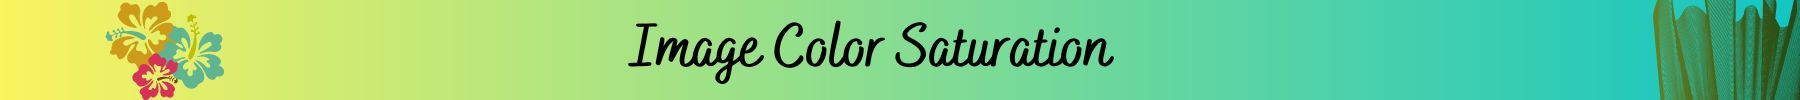

In [21]:
img= cv2.imread (r'content\Grapevine Image Classification\HibiscusFlower.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

img[greenMask == 255] = (0, 255, 0)


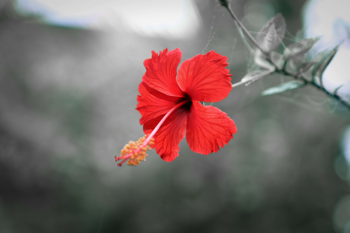
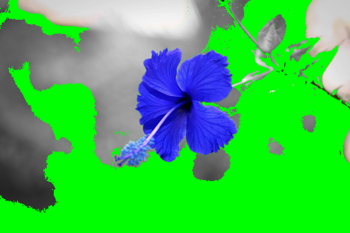


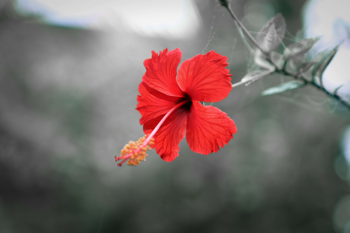
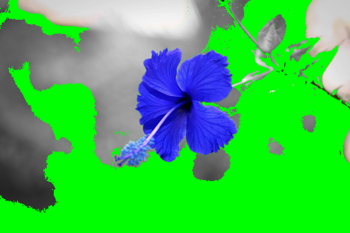

In [22]:
images_list=[image, img]
labels = ['Original','Saturated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=350)

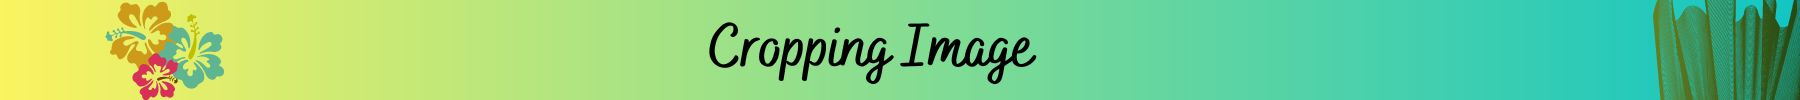

In [23]:
cropped = image[1400:2550,1500:3500]


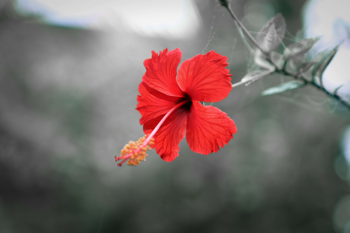
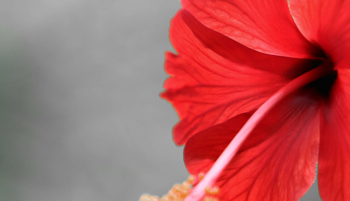


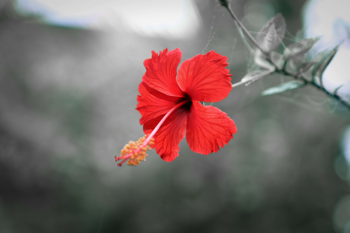
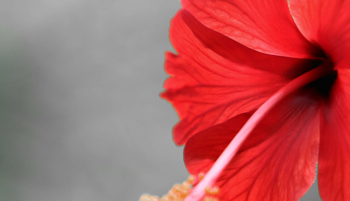

In [24]:
images_list=[image, cropped]
labels = ['Original','Cropped']
ipyplot.plot_images(images_list,labels=labels,img_width=350)